In [14]:
import pandas as pd

In [15]:
pmi = pd.read_csv ('./dataset/pmi.csv', encoding='unicode_escape')

In [16]:
pmi['time'] = pmi['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
pmi['time'] = pd.to_datetime(pmi["time"])
pmi.set_index('time', inplace=True)
pmi = pmi.reindex(pd.date_range(start=pmi.index.min(),
                                                  end=pmi.index.max(),
                                                  freq='1D'))

In [17]:
pmi.interpolate(method='pad', inplace=True)
pmi.index.names = ['Dates']

In [18]:
pmi = pmi[(pmi.index >= '1976-06-01') & (pmi.index <= '2022-11-02')]

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")


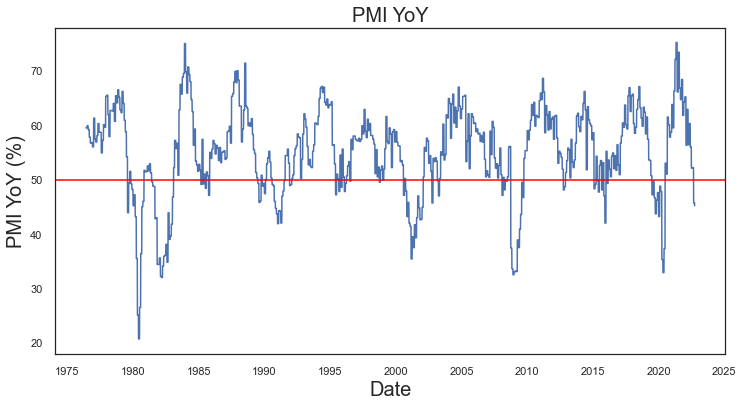

In [20]:
plt.plot(pmi, color= 'b')
plt.title('PMI YoY', fontsize= 20)
plt.xlabel('Date', fontsize= 20)
plt.ylabel('PMI YoY (%)', fontsize= 20)
plt.axhline(y=50, color= 'red')
plt.style.use('seaborn')

In [21]:
bonds = pd.read_csv ('./dataset/10y_2y.csv', encoding='unicode_escape')

In [22]:
bonds['time'] = bonds['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
bonds['time'] = pd.to_datetime(bonds["time"])
bonds.set_index('time', inplace=True)
bonds = bonds.reindex(pd.date_range(start=bonds.index.min(),
                                                  end=bonds.index.max(),
                                                  freq='1D'))
bonds.interpolate(method='pad', inplace=True)

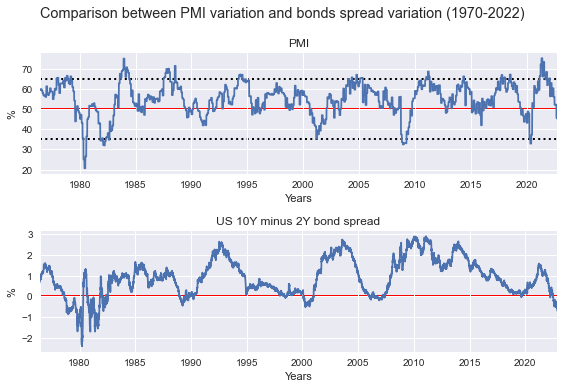

In [60]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Comparison between PMI variation and bonds spread variation (1970-2022)')

#ax1
pmi.close.plot.line(ax = ax1)
bonds.close.plot.line(ax = ax2)
ax1.axhline(y=50, c="red", linewidth=2, zorder=0)
ax1.axhline(y=35, c="black", linewidth=2, linestyle = 'dotted', zorder=0)
ax1.axhline(y=65, c="black", linewidth=2, linestyle = 'dotted', zorder=0)
ax1.set_title('PMI')
ax1.set(xlabel='Years', ylabel='%')

#ax2
ax2.axhline(y=0, c="red", linewidth=2, zorder=0)
ax2.set_title('US 10Y minus 2Y bond spread')
ax2.set(xlabel='Years', ylabel='%')

#plot
fig.tight_layout()
plt.show()



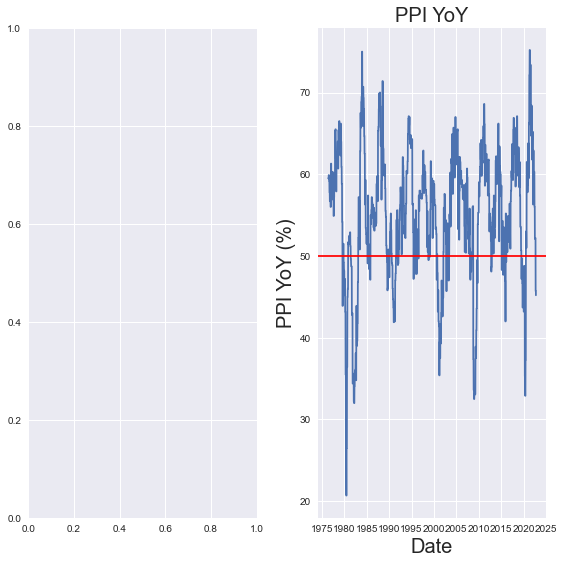

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
plt.plot(pmi, color= 'b')
plt.title('PPI YoY', fontsize= 20)
plt.xlabel('Date', fontsize= 20)
plt.ylabel('PPI YoY (%)', fontsize= 20)
plt.axhline(y=50, color= 'red')
plt.style.use('seaborn')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()